In [24]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv("/content/Mall_Customers.csv")

In [26]:
print(data)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [27]:
X = data[['Annual Income (k$)']]

In [34]:
print(X)

     Annual Income (k$)
0                    15
1                    15
2                    16
3                    16
4                    17
..                  ...
195                 120
196                 126
197                 126
198                 137
199                 137

[200 rows x 1 columns]


In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [30]:
n_clusters = 3

In [31]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


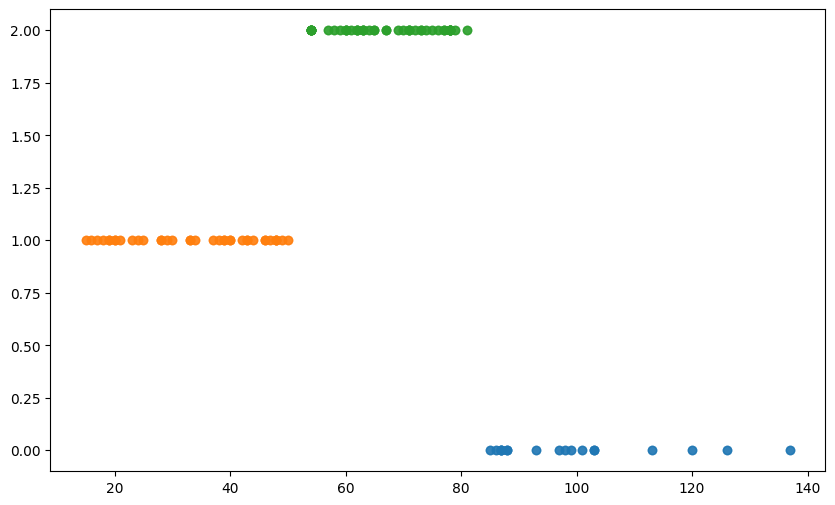

In [32]:
plt.figure(figsize=(10, 6))

for cluster in range(n_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], [cluster] * len(cluster_data), label=f'Cluster {cluster + 1}', alpha=0.7)


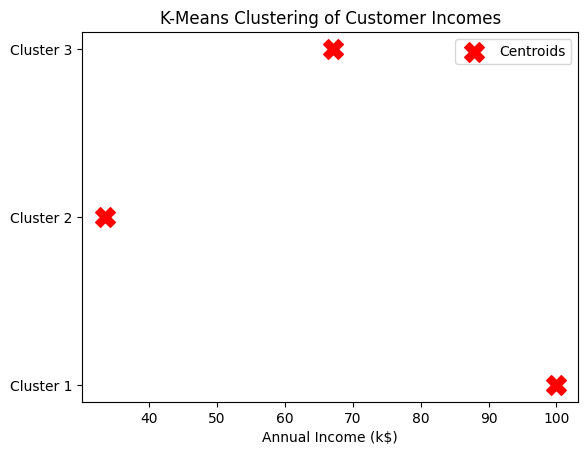

In [33]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids, range(n_clusters), marker='X', color='red', s=200, label='Centroids')

plt.title('K-Means Clustering of Customer Incomes')
plt.xlabel('Annual Income (k$)')
plt.yticks(range(n_clusters), [f'Cluster {i + 1}' for i in range(n_clusters)])
plt.legend()
plt.show()
